In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import fetch_california_housing as fch 

In [2]:
housevalue = fch()
x = pd.DataFrame(housevalue.data)
x.columns = housevalue.feature_names
y = housevalue.target

In [3]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 420)
for i in [xtrain,xtest]:
    i.index = range(i.shape[0]) #恢复索引

In [4]:
reg_model = LR().fit(xtrain,ytrain)
y_predict = reg_model.predict(xtest)

In [5]:
reg_model.coef_ #特征所对应的系数w

array([ 4.36594049e-01,  9.93837496e-03, -1.11521690e-01,  6.57104599e-01,
       -1.18750427e-06, -3.50758479e-03, -4.15876021e-01, -4.28529487e-01])

In [6]:
[*zip(xtrain.columns,reg_model.coef_)] #zip将结构相似的两组数据合并/匹配

[('MedInc', 0.4365940491672176),
 ('HouseAge', 0.0099383749640425),
 ('AveRooms', -0.11152169049807654),
 ('AveBedrms', 0.6571045989059942),
 ('Population', -1.187504269299644e-06),
 ('AveOccup', -0.003507584788462986),
 ('Latitude', -0.41587602106112986),
 ('Longitude', -0.42852948717828604)]

In [7]:
reg_model.intercept_ #截距

-36.4327745882279

In [8]:
#### Multivar-regression的模型评估指标
#找真实值和预测值的差异
from sklearn.metrics import mean_squared_error as MSE
MSE(y_predict,ytest)

0.5202857882372669

In [9]:
print(y.max());print(y.min()) #模型评估较差(因为MSE远大于y.min())

5.00001
0.14999


In [10]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [11]:
cross_val_score(reg_model,x,y,cv = 10,scoring = "neg_mean_squared_error") #(回归模型,x,y,交叉验证次数) MSE为负表示损失

array([-0.48922052, -0.43335865, -0.8864377 , -0.39091641, -0.7479731 ,
       -0.52980278, -0.28798456, -0.77326441, -0.64305557, -0.3275106 ])

In [12]:
##三种方式计算 r2
from sklearn.metrics import r2_score
r2_score(ytest,y_predict) #必须真实值在前
#r2_score(y_true = ytest,y_pred = y_predict)

0.6070519584922172

In [13]:
r2 = reg_model.score(xtest,ytest)
r2

0.6070519584922172

In [14]:
cross_val_score(reg_model,x,y,cv = 5,scoring = "r2").mean() #交叉验证法求r2

0.5530311140279566

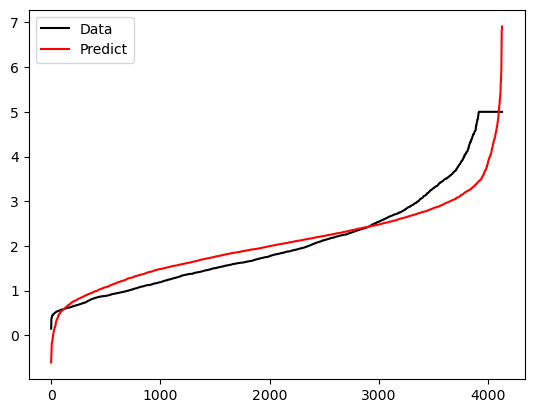

In [15]:
import matplotlib.pyplot as plt
plt.plot(range(len(ytest)),sorted(ytest),c="k",label = "Data")
plt.plot(range(len(y_predict)),sorted(y_predict),c="red",label = "Predict")
plt.legend()
plt.show()

In [16]:
random_number_generator = np.random.RandomState() #创建随机数生成器
x = random_number_generator.randn(100,80) #创建(100,80)格式的随机数
y = random_number_generator.randn(100)
cross_val_score(LR(),x,y,cv = 5, scoring = 'r2').mean() # r2为负

-87.62146149720472

In [17]:
##精确相关关系和高度相关关系为多重共线性(multicollinearity),有多重共线性的模型几乎无法使用
#可以使用先验方法删除有多重共线性的特征
#可以使用向前逐步回归(筛选对标签解释力度强的特征,对存在多重共线性的特征加上惩罚项)
#可以使用岭回归,Lasso,弹性网(改进的线性回归)

In [18]:
#重新部署
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()
x = pd.DataFrame(housevalue.data)
x.columns = housevalue.feature_names
y = housevalue.target

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 420)
for i in [xtrain,xtest]:
    i.index = range(i.shape[0])

In [19]:
ridge_reg = Ridge(alpha = 3).fit(x,y)
ridge_reg.score(xtest,ytest) #之前的数据中应该不存在共线性问题

0.6078558846030979

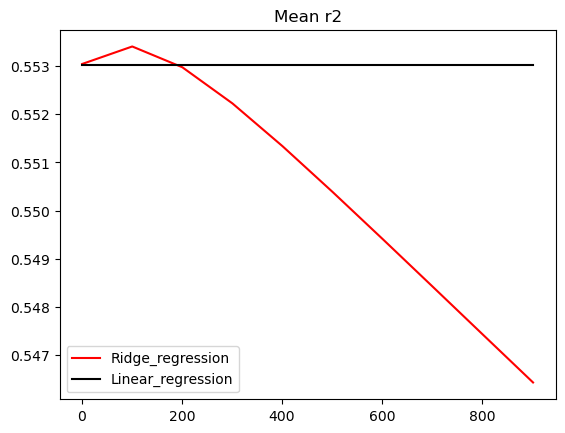

The best r2 value is 0.5534 and its corresponding alpha is 101


In [20]:
#交叉验证:线性回归和岭回归的结果
alpharange = np.arange(1,1001,100)
ridge_regression,linear_regression = [],[]
best_r2 = -np.inf
best_alpha = None
for alpha in alpharange:
    ridge = Ridge(alpha = alpha)
    linear = LinearRegression()
    ridge_reg_result = cross_val_score (ridge,x,y,cv = 5, scoring = "r2").mean()
    linear_reg_result = cross_val_score(linear,x,y,cv = 5, scoring = "r2").mean()
    ridge_regression.append(ridge_reg_result)
    linear_regression.append(linear_reg_result)
    if ridge_reg_result > best_r2:
        best_r2 = ridge_reg_result
        best_alpha = alpha
    
plt.plot(alpharange,ridge_regression,color = "red",label = "Ridge_regression")
plt.plot(alpharange,linear_regression,color = "k",label = "Linear_regression")
plt.title("Mean r2")
plt.legend(loc = 0)
plt.show()

print(f"The best r2 value is {best_r2:.4f} and its corresponding alpha is {best_alpha}")
##说明只有轻微的共线性

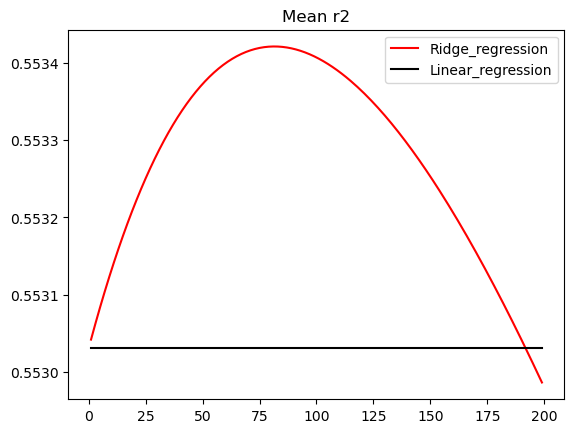

The best r2 value is 0.5534 and its corresponding alpha is 81


In [21]:
#细化学习曲线
alpharange = np.arange(1,200,1)
ridge_regression,linear_regression = [],[]
best_r2 = -np.inf
best_alpha = None
for alpha in alpharange:
    ridge = Ridge(alpha = alpha)
    linear = LinearRegression()
    ridge_reg_result = cross_val_score (ridge,x,y,cv = 5, scoring = "r2").mean()
    linear_reg_result = cross_val_score(linear,x,y,cv = 5, scoring = "r2").mean()
    ridge_regression.append(ridge_reg_result)
    linear_regression.append(linear_reg_result)
    if ridge_reg_result > best_r2:
        best_r2 = ridge_reg_result
        best_alpha = alpha
    
plt.plot(alpharange,ridge_regression,color = "red",label = "Ridge_regression")
plt.plot(alpharange,linear_regression,color = "k",label = "Linear_regression")
plt.title("Mean r2")
plt.legend(loc = 0)
plt.show()

print(f"The best r2 value is {best_r2:.4f} and its corresponding alpha is {best_alpha}")

In [22]:
#使用新的波士顿房价数据集
import pandas as pd
import numpy as np
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
x = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [23]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 420)

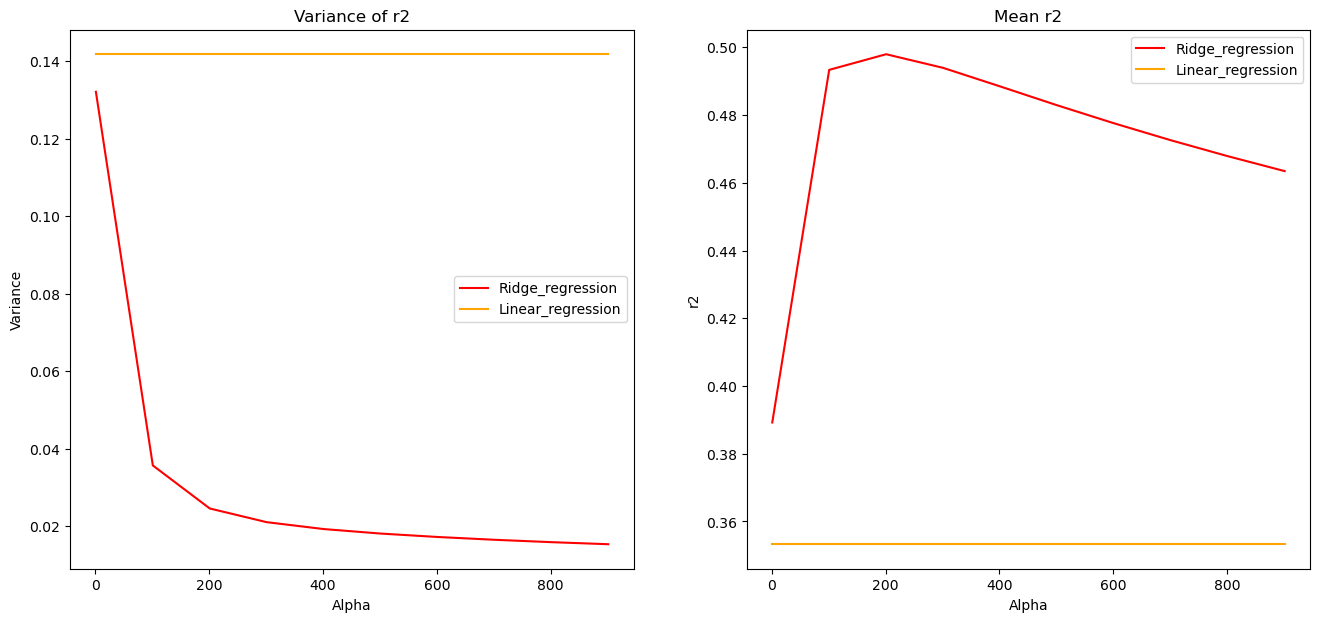

The best r2 value is 0.4980 and its corresponding alpha is 201


In [24]:
#交叉验证:线性回归和岭回归的结果
alpharange = np.arange(1,1001,100)
ridge_regression,linear_regression = [],[]
best_r2 = -np.inf
best_alpha = None

for alpha in alpharange:
    ridge = Ridge(alpha = alpha)
    linear = LinearRegression()
    ridge_reg_result = cross_val_score(ridge, x, y, cv=5, scoring="r2").var()
    linear_reg_result = cross_val_score(linear, x, y, cv=5, scoring="r2").var()
    ridge_regression.append(ridge_reg_result)
    linear_regression.append(linear_reg_result)
    if ridge_reg_result > best_r2:
        best_r2 = ridge_reg_result
        best_alpha = alpha

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(16, 7))

# Plot the variance of the cross-validation scores
axs[0].plot(alpharange, ridge_regression, color="red", label="Ridge_regression")
axs[0].plot(alpharange, linear_regression, color="orange", label="Linear_regression")
axs[0].set_title("Variance of r2")
axs[0].set_xlabel("Alpha")
axs[0].set_ylabel("Variance")
axs[0].legend(loc=0)

ridge_regression, linear_regression = [], []
best_r2 = -np.inf
best_alpha = None

for alpha in alpharange:
    ridge = Ridge(alpha=alpha)
    linear = LinearRegression()
    ridge_reg_result = cross_val_score(ridge, x, y, cv=5, scoring="r2").mean()
    linear_reg_result = cross_val_score(linear, x, y, cv=5, scoring="r2").mean()
    ridge_regression.append(ridge_reg_result)
    linear_regression.append(linear_reg_result)
    if ridge_reg_result > best_r2:
        best_r2 = ridge_reg_result
        best_alpha = alpha

# Plot the mean of the cross-validation scores
axs[1].plot(alpharange, ridge_regression, color="red", label="Ridge_regression")
axs[1].plot(alpharange, linear_regression, color="orange", label="Linear_regression")
axs[1].set_title("Mean r2")
axs[1].set_xlabel("Alpha")
axs[1].set_ylabel("r2")
axs[1].legend(loc=0)

plt.show()

print(f"The best r2 value is {best_r2:.4f} and its corresponding alpha is {best_alpha}")
#可见波士顿数据'存在'多重共线性问题

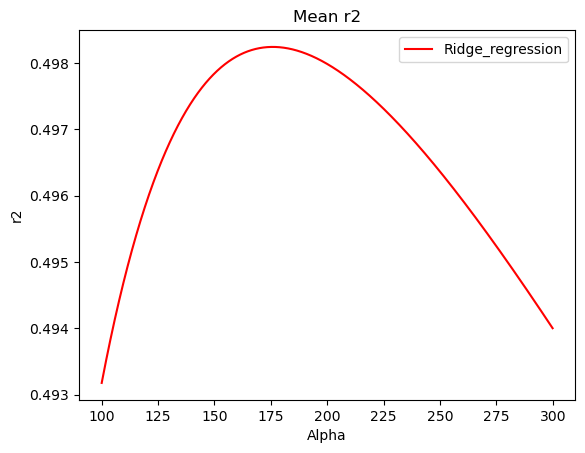

The best r2 value is 0.4982 and its corresponding alpha is 175.7999999999957


In [25]:
#细化学习曲线
alpharange = np.arange(100,300,0.1)
ridge_regression,linear_regression = [],[]
best_r2 = -np.inf
best_alpha = None

for alpha in alpharange:
    ridge = Ridge(alpha=alpha)
    #linear = LinearRegression()
    ridge_reg_result = cross_val_score(ridge, x, y, cv=5, scoring="r2").mean()
    #linear_reg_result = cross_val_score(linear, x, y, cv=5, scoring="r2").mean()
    ridge_regression.append(ridge_reg_result)
    #linear_regression.append(linear_reg_result)
    if ridge_reg_result > best_r2:
        best_r2 = ridge_reg_result
        best_alpha = alpha

plt.plot(alpharange, ridge_regression, color="red", label="Ridge_regression")
#plt.plot(alpharange, linear_regression, color="orange", label="Linear_regression")
plt.title("Mean r2")
plt.xlabel("Alpha")
plt.ylabel("r2")
plt.legend(loc=0)
plt.show()

print(f"The best r2 value is {best_r2:.4f} and its corresponding alpha is {best_alpha}")

In [26]:
#绘制岭迹图(ridge coefficients)
#岭迹图交叉越多,多重共线性越高
#选取系数较平稳的喇叭口作为alpha的取值
#不推荐

In [27]:
#重新部署
#使用内置交叉验证计算最佳正则化参数alpha
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,LinearRegression,Lasso,RidgeCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()
x = pd.DataFrame(housevalue.data)
x.columns = housevalue.feature_names
y = housevalue.target

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 420)
for i in [xtrain,xtest]:
    i.index = range(i.shape[0])


In [28]:
Ridge_CV = RidgeCV(alphas = np.arange(1,1001,1),
                   scoring = "r2",
                   store_cv_values = True,
                   cv = None
                  ).fit(x,y)
Ridge_CV.score(x,y)

0.6060179224995206

In [29]:
Ridge_CV.cv_values_ #所有交叉验证的结果
Ridge_CV.cv_values_.shape

(20640, 1000)

In [30]:
Ridge_CV.alpha_ #输出交叉验证过程选出的最佳的alpha

103

In [31]:
Ridge_CV = RidgeCV(alphas = np.arange(1,1001,1),
                   scoring = "neg_mean_squared_error",
                   store_cv_values = True,
                   cv = None
                  ).fit(x,y)

Ridge_CV.alpha_

103

In [32]:
Ridge_CV = RidgeCV(alphas = np.arange(1,1001,10),
                   cv = 5
                  ).fit(x,y)

Ridge_CV.alpha_

81

In [33]:
##Lasso回归:Lasso无法解决精确相关的问题,其他与岭回归相似
#优势:可以在线性模型中做特征选择 (哪个特征比较重要),并且保留数据本身

#重新部署
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,LinearRegression,Lasso,RidgeCV
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

housevalue = fetch_california_housing()
x = pd.DataFrame(housevalue.data)
x.columns = housevalue.feature_names
y = housevalue.target

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = 0.2,random_state = 420)
for i in [xtrain,xtest]:
    i.index = range(i.shape[0])

In [34]:
linear_reg = LinearRegression().fit(xtrain,ytrain)
ridge_reg = Ridge(alpha = 0).fit(xtrain,ytrain)

In [35]:
lasso_reg = Lasso(alpha = 0).fit(xtrain,ytrain)

C:\Users\boyua\AppData\Local\Temp\ipykernel_17512\3015296626.py:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_reg = Lasso(alpha = 0).fit(xtrain,ytrain)
A:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
A:\Anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.338e+03, tolerance: 2.202e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


In [36]:
(linear_reg.coef_*100).tolist()

[43.65940491672176,
 0.99383749640425,
 -11.152169049807654,
 65.71045989059941,
 -0.0001187504269299644,
 -0.3507584788462986,
 -41.58760210611299,
 -42.8529487178286]

In [37]:
(ridge_reg.coef_*100).tolist()

[43.65940491672284,
 0.9938374964042016,
 -11.152169049809158,
 65.71045989060555,
 -0.00011875042692439473,
 -0.35075847884631084,
 -41.587602106111355,
 -42.85294871782709]

In [38]:
(lasso_reg.coef_*100).tolist() #alpha = 0 的lasso回归和岭回归,线性回归表现(参数)差不多

[43.65940491672172,
 0.9938374964041858,
 -11.152169049807684,
 65.71045989059927,
 -0.00011875042692441612,
 -0.35075847884630534,
 -41.58760210611309,
 -42.852948717828596]

In [39]:
lasso_reg = Lasso(alpha = 0.01).fit(xtrain,ytrain)
(lasso_reg.coef_*100).tolist()

[40.0337063341464,
 1.0666355594217996,
 -4.084578685540635,
 29.074719389912417,
 0.00015251664223477944,
 -0.3361337101897199,
 -40.32781327620261,
 -41.0318309093648]

In [40]:
lasso_reg = Lasso(alpha = 0.1).fit(xtrain,ytrain)
(lasso_reg.coef_*100).tolist()

[38.86119337029469,
 1.5781571444263576,
 -0.0,
 0.0,
 0.0021282205032307636,
 -0.31243610940553757,
 -11.08610250128114,
 -9.54832163500083]

In [41]:
lasso_reg = Lasso(alpha = 1).fit(xtrain,ytrain)
(lasso_reg.coef_*100).tolist()

[14.64014856092991,
 0.6406865588889887,
 0.0,
 -0.0,
 -0.0005086758926855246,
 -0.0,
 -0.0,
 -0.0]

In [42]:
lasso_reg = Lasso(alpha = 1.51).fit(xtrain,ytrain)
(lasso_reg.coef_*100).tolist()

[0.2105379439381294, 0.0, 0.0, -0.0, -0.002606607132465435, -0.0, -0.0, -0.0]

In [43]:
#使用交叉验证选取lasso回归的正则化alpha参数
from sklearn.linear_model import LassoCV

alpha_range = np.logspace(-10,-2,1000,base = 10)

lasso_reg_1 = LassoCV(alphas = alpha_range,
                      cv = 5,
                     ).fit(xtrain,ytrain)
lasso_reg_1.alpha_

0.001867545842761074

In [44]:
lasso_reg_1.mse_path_.mean(axis = 1)

array([0.53194042, 0.5317836 , 0.53162447, 0.53147203, 0.53132579,
       0.53118549, 0.53105091, 0.53092186, 0.53079805, 0.53067935,
       0.53056688, 0.53045784, 0.53035321, 0.53025291, 0.5301567 ,
       0.53006459, 0.52997641, 0.52989208, 0.52981115, 0.52973363,
       0.5296594 , 0.52958823, 0.5295202 , 0.52945512, 0.52939305,
       0.52933352, 0.52927657, 0.52922209, 0.52916986, 0.52912006,
       0.52907265, 0.52902722, 0.52898382, 0.52894242, 0.52890287,
       0.52886507, 0.52882903, 0.52879467, 0.5287619 , 0.52873067,
       0.5287009 , 0.5286727 , 0.52864575, 0.52861985, 0.52859536,
       0.5285721 , 0.52855013, 0.52852914, 0.52850918, 0.52849024,
       0.52847226, 0.52845523, 0.52843883, 0.5284235 , 0.528409  ,
       0.5283953 , 0.52838234, 0.52837011, 0.52835856, 0.52834767,
       0.52833752, 0.52832779, 0.52831949, 0.52831111, 0.52830311,
       0.5282956 , 0.52828856, 0.52828198, 0.52827585, 0.52827013,
       0.52826482, 0.5282599 , 0.52825502, 0.52825076, 0.52824

In [45]:
lasso_reg_1.coef_ ##特征系数

array([ 4.29813250e-01,  1.00741853e-02, -9.83087972e-02,  5.88630004e-01,
       -6.78493695e-07, -3.48023363e-03, -4.13542191e-01, -4.25146790e-01])

In [46]:
lasso_reg_1.score(xtest,ytest)

0.6070012541571529

In [47]:
##另一种方法
lasso_reg_2 = LassoCV(eps = 0.0000001, #最小间隔
                      n_alphas = 100000,
                      cv = 5,
                     ).fit(xtrain,ytrain)
lasso_reg_2.alpha_

0.0018558529196715157

In [48]:
lasso_reg_2.alphas_.shape

(100000,)

In [49]:
lasso_reg_2.score(xtest,ytest)

0.6070023641341611

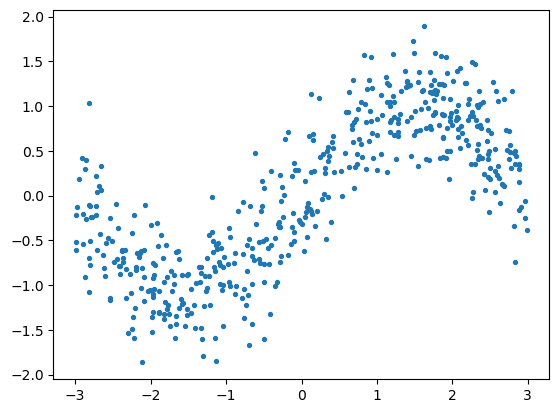

In [66]:
####多项式回归####
from sklearn.tree import DecisionTreeRegressor

#设置随机数
rnd = np.random.RandomState()
x = rnd.uniform(-3,3,size = 500) #在(-3,3)取出100个随机数 作为横坐标
y = np.sin(x) + rnd.normal(size = len(x))/2.5 #对x取sin,并且加上一个服从正态分布的随机数

plt.scatter(x,y,marker = "o",s = 8)
plt.show()

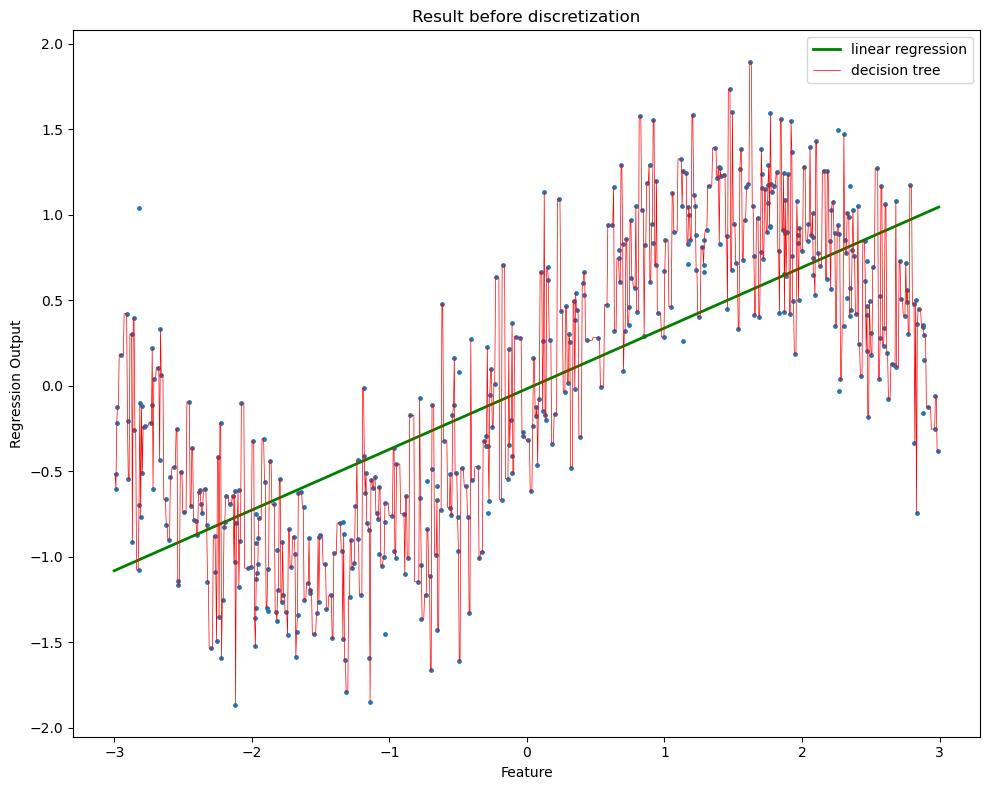

In [105]:
x = x.reshape(-1,1)
linear_reg = LinearRegression().fit(x,y)
Decision_tree = DecisionTreeRegressor(random_state = 0).fit(x,y)

fig,subplot = plt.subplots(1,figsize=(10,8))
line = np.linspace(-3,3,1000,endpoint = False).reshape(-1,1) #line作为测试集

subplot.scatter(x,y,marker = "o",s = 6)
subplot.plot(line,linear_reg.predict(line), linewidth = 2, color = "green",
            label = "linear regression")
subplot.plot(line,Decision_tree.predict(line),linewidth = 0.5, color = "red",
            label = "decision tree")
subplot.legend(loc = 0)
subplot.set_ylabel("Regression Output")
subplot.set_xlabel("Feature")
subplot.set_title("Result before discretization")
plt.tight_layout()
plt.show()

In [132]:
##使用分箱处理非线性数据 (将曲线分段,分段函数)
from sklearn.preprocessing import KBinsDiscretizer

enc = KBinsDiscretizer(n_bins = 10, #分为几端
                       encode = "onehot") #使用哑变量的方式
#哑变量方式output一个(x,n_bins)的稀疏矩阵

x_binned = enc.fit_transform(x)
x_binned

<500x10 sparse matrix of type '<class 'numpy.float64'>'
	with 500 stored elements in Compressed Sparse Row format>

In [133]:
pd.DataFrame(x_binned.toarray())

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
495,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
496,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
498,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
linear_reg_binned = LinearRegression().fit(x_binned,y)
line_binned = enc.transform(line) #将测试集同样分箱

linear_reg_binned.predict(line_binned).shape

(1000,)

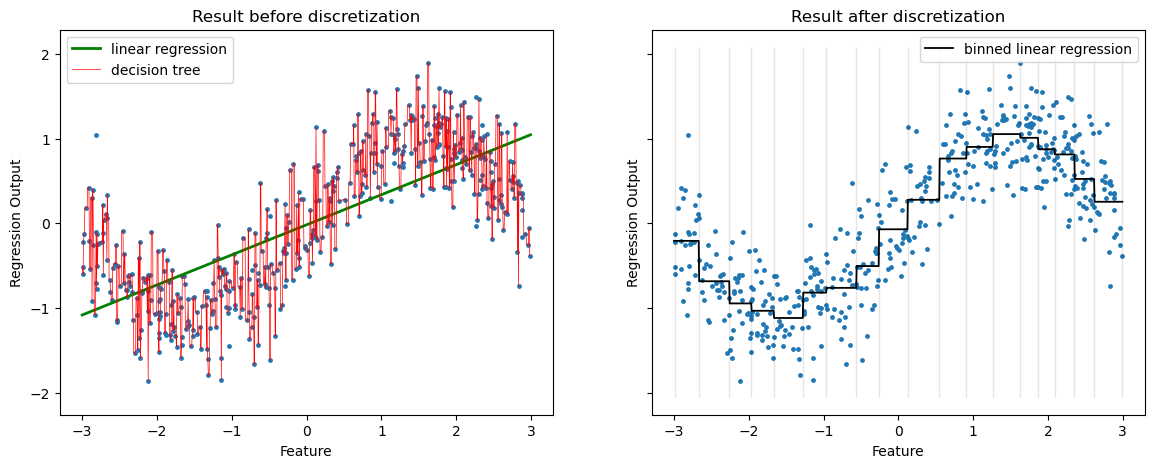

In [186]:
#之前代码(创建数据)
enc = KBinsDiscretizer(n_bins = 18,
                       encode = "onehot")
x_binned = enc.fit_transform(x)
linear_reg_binned = LinearRegression().fit(x_binned,y)
line_binned = enc.transform(line)
#画图
fig,(subplot_1,subplot_2) = plt.subplots(ncols = 2,
                                         sharey = True,
                                         figsize = (14,5)
                                        )
line = np.linspace(-3,3,1000,endpoint = False).reshape(-1,1) #line作为测试集

subplot_1.scatter(x,y,marker = "o",s = 6)
subplot_1.plot(line,linear_reg.predict(line), linewidth = 2, color = "green",
            label = "linear regression")
subplot_1.plot(line,Decision_tree.predict(line),linewidth = 0.5, color = "red",
            label = "decision tree")
subplot_1.legend(loc = 0)
subplot_1.set_ylabel("Regression Output")
subplot_1.set_xlabel("Feature")
subplot_1.set_title("Result before discretization")

subplot_2.scatter(x,y,marker = "o",s = 6)
subplot_2.plot(line,linear_reg_binned.predict(line_binned),linewidth = 1.3, color = "k",
            label = "binned linear regression")
subplot_2.legend(loc = 0)
#画和箱宽一样的竖线
subplot_2.vlines(enc.bin_edges_[0], #箱的边缘
                 *plt.gca().get_ylim(),
                 linewidth = 1,
                 alpha = 0.1,
                 color = "k"
                )
subplot_2.set_xlabel("Feature")
subplot_2.set_ylabel("Regression Output")
subplot_2.set_title("Result after discretization")

plt.show()

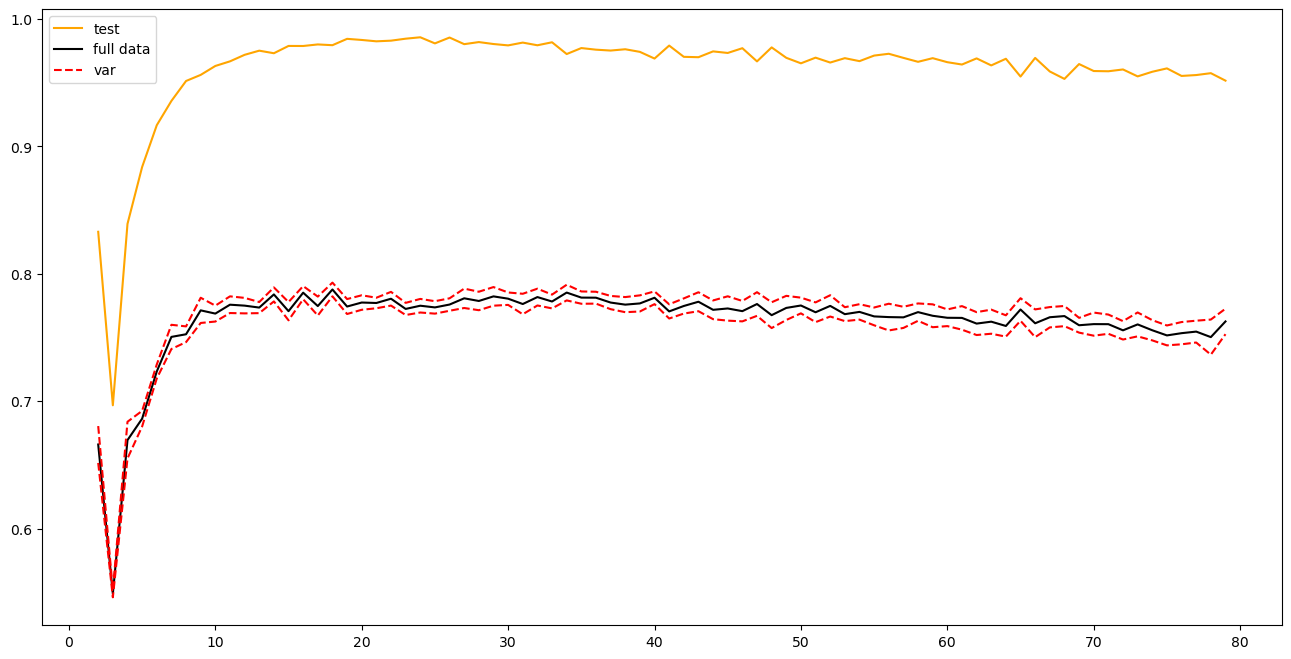

Best Score: 0.787716  Bins (for Score): 18
Best Predict: 0.985732  Bins (for Predict): 24


In [189]:
#选择最优的分箱数,学习曲线
predict, score, var = [],[],[]
binsrange = np.arange(2, 80)
for i in binsrange:
    enc = KBinsDiscretizer(n_bins = i,encode = "onehot")
    x_binned = enc.fit_transform(x)
    line = np.linspace(-3,3,1000,endpoint = False).reshape(-1,1)
    line_binned = enc.transform(line)
    LR = LinearRegression()
    result = cross_val_score(LR,x_binned,y,cv = 10)
    score.append(result.mean()) #交叉验证的r2
    var.append(result.var())
    predict.append(LR.fit(x_binned,y).score(line_binned,np.sin(line))) #测试集上面的r2
    
plt.figure(figsize = (16,8))
plt.plot(binsrange,predict,c = "orange",label = "test")
plt.plot(binsrange,score,c = "k",label = "full data")
plt.plot(binsrange,score + np.array(var)*3,c = "red",linestyle = "--",label = "var")
plt.plot(binsrange,score - np.array(var)*3,c = "red",linestyle = "--")
plt.legend(loc = 0)
plt.show()

best_score = max(score)
best_bins_score = binsrange[score.index(best_score)]
best_predict = max(predict)
best_bins_predict = binsrange[predict.index(best_predict)]
print("Best Score: %f  Bins (for Score): %d" % (best_score, best_bins_score))
print("Best Predict: %f  Bins (for Predict): %d" % (best_predict, best_bins_predict))

In [349]:
###多项式回归###
from sklearn.preprocessing import PolynomialFeatures

In [202]:
x = np.arange(1,4).reshape(-1,1)
x

array([[1],
       [2],
       [3]])

In [203]:
#对该数据进行多项式转化(升为6维)
x_poly = PolynomialFeatures(degree = 5).fit_transform(x)
x_poly

array([[  1.,   1.,   1.,   1.,   1.,   1.],
       [  1.,   2.,   4.,   8.,  16.,  32.],
       [  1.,   3.,   9.,  27.,  81., 243.]])

In [205]:
###1,1,1列为截距项,一般关掉(避免被识别为特征)
x_poly = PolynomialFeatures(degree = 5,include_bias = False).fit_transform(x)
x_poly

array([[  1.,   1.,   1.,   1.,   1.],
       [  2.,   4.,   8.,  16.,  32.],
       [  3.,   9.,  27.,  81., 243.]])

In [219]:
#二次多项式
x = np.arange(6).reshape(3,2)
x

array([[0, 1],
       [2, 3],
       [4, 5]])

In [214]:
PolynomialFeatures(degree = 2,include_bias = False).fit_transform(x)
#原始是二维数据,输出为5维数据

array([[ 0.,  1.,  0.,  0.,  1.],
       [ 2.,  3.,  4.,  6.,  9.],
       [ 4.,  5., 16., 20., 25.]])

In [216]:
#参数只生成交互项(interaction_only = True):消除x3来避免共线性
PolynomialFeatures(degree = 2,include_bias = False,interaction_only = True).fit_transform(x)
#output只为[x1,x2,x1x2]

array([[ 0.,  1.,  0.],
       [ 2.,  3.,  6.],
       [ 4.,  5., 20.]])

In [222]:
x = np.arange(9).reshape(3,3)
PolynomialFeatures(degree = 2,include_bias = False,interaction_only = True).fit_transform(x)

array([[ 0.,  1.,  2.,  0.,  0.,  2.],
       [ 3.,  4.,  5., 12., 15., 20.],
       [ 6.,  7.,  8., 42., 48., 56.]])

In [232]:
x = np.arange(20).reshape(2,10)
PolynomialFeatures(degree = 20,include_bias = False).fit_transform(x).shape

(2, 30045014)

In [315]:
#生成数据集
rnd = np.random.RandomState()
x = rnd.uniform(-3,3,size = 500) 
y = np.sin(x) + rnd.normal(size = len(x))/2.5
x = x.reshape(-1,1)
line = np.linspace(-3,3,1000,endpoint = False).reshape(-1,1)

In [316]:
#线性拟合
linear_reg = LinearRegression().fit(x,y)
linear_reg.score(x,y)

0.5423866914847877

In [317]:
#多项式拟合
x_poly = PolynomialFeatures(degree = 5, include_bias = False).fit_transform(x)
poly_linear_reg = LinearRegression().fit(x_poly, y)
poly_linear_reg.score(x_poly, y)

0.7721305135506374

In [318]:
line_poly = PolynomialFeatures(degree = 5, include_bias = False).fit_transform(line)
#测试集上的拟合效果
poly_linear_reg.score(line_poly, np.sin(line))
#模型没有过拟合 (测试集上效果更好)

0.9954731268436421

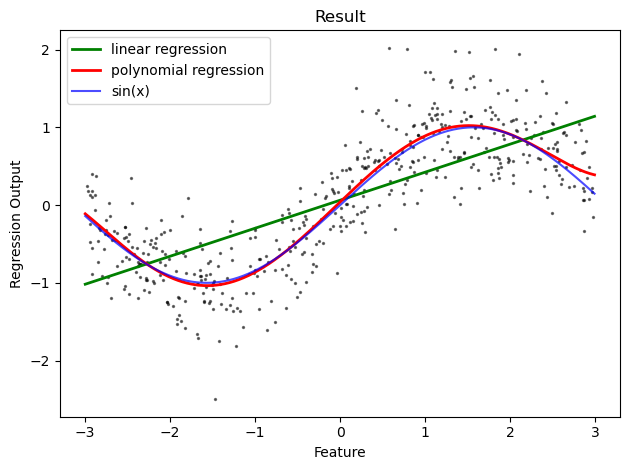

In [327]:
##画图
fig,subplot = plt.subplots(1)
subplot.scatter(x,y,marker = "o",color = "k",s = 2,alpha = 0.5)
subplot.plot(line,linear_reg.predict(line), linewidth = 2, color = "green",
            label = "linear regression")
subplot.plot(line,poly_linear_reg.predict(line_poly),linewidth = 2, color = "red",
            label = "polynomial regression")
subplot.plot(line, np.sin(line), linewidth = 1.5, color = "blue", label="sin(x)", alpha = 0.7)
subplot.legend(loc = 0)
subplot.set_ylabel("Regression Output")
subplot.set_xlabel("Feature")
subplot.set_title("Result")
plt.tight_layout()
plt.show()

In [329]:
##多项式回归的可解释性
#接口get_feature_names()

In [350]:
#重新部署加州房价数据
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge,LinearRegression,Lasso
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.datasets import fetch_california_housing as fch
import matplotlib.pyplot as plt

housevalue = fch()
x = pd.DataFrame(housevalue.data)
x.columns = housevalue.feature_names
y = housevalue.target

In [364]:
poly = PolynomialFeatures(degree = 2, include_bias = False).fit(x,y)
poly.get_feature_names_out(x.columns)

array(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [365]:
x_poly = poly.transform(x)
poly_linear_reg = LinearRegression().fit(x_poly,y)
#每个特征对应参数
[*zip(poly.get_feature_names_out(x.columns),poly_linear_reg.coef_)]

[('MedInc', -11.243025193200063),
 ('HouseAge', -0.8488985460391875),
 ('AveRooms', 6.441058911442236),
 ('AveBedrms', -31.591328352804144),
 ('Population', 0.00040609034217663995),
 ('AveOccup', 1.0038623399066104),
 ('Latitude', 8.70568188097263),
 ('Longitude', 5.880632721669114),
 ('MedInc^2', -0.03130812707485629),
 ('MedInc HouseAge', 0.0018599469645072103),
 ('MedInc AveRooms', 0.04330204640573157),
 ('MedInc AveBedrms', -0.18614227458864754),
 ('MedInc Population', 5.728315846585327e-05),
 ('MedInc AveOccup', -0.0025901951950104006),
 ('MedInc Latitude', -0.15250571188590606),
 ('MedInc Longitude', -0.14424293907208363),
 ('HouseAge^2', 0.00021172535355571672),
 ('HouseAge AveRooms', -0.001262190161459385),
 ('HouseAge AveBedrms', 0.010611506299857342),
 ('HouseAge Population', 2.8188535878548304e-06),
 ('HouseAge AveOccup', -0.001817169458770886),
 ('HouseAge Latitude', -0.010069037131397604),
 ('HouseAge Longitude', -0.00999950167098094),
 ('AveRooms^2', 0.007269477243017598)

In [372]:
df = pd.DataFrame([poly.get_feature_names_out(x.columns),poly_linear_reg.coef_.tolist()]).T
df.columns = ["Features","coef"]
df

,Features,coef
0,MedInc,-11.243025
1,HouseAge,-0.848899
2,AveRooms,6.441059
3,AveBedrms,-31.591328
4,Population,0.000406
5,AveOccup,1.003862
6,Latitude,8.705682
7,Longitude,5.880633
8,MedInc^2,-0.031308
9,MedInc HouseAge,0.00186


In [387]:
poly = PolynomialFeatures(degree = 3, include_bias = False).fit(x,y)
x_poly = poly.transform(x)
from time import time
time0 = time()
poly_model = LinearRegression().fit(x_poly,y)
print("r2: {}".format(poly_model.score(x_poly,y)))
print("time: {}".format(time()-time0))

r2: 0.7379797392110039
time: 0.07068538665771484


In [392]:
from sklearn.ensemble import RandomForestRegressor as rf
time0 = time()
print("r2: {}".format(rf(n_estimators = 10000).fit(x,y).score(x,y)))
print("time: {}".format(time()-time0))

r2: 0.9754582920245652
time: 1439.1462943553925
